# Medidas de posição: média, moda, mediana, percentis, quartis.

As medidas de posição são valores que representam a tendência de concentração dos dados observados em experimentos. As mais importantes são as medidas de tendência central. As três medidas de tendência central mais utilizadas são: média, moda e mediana. Outras medidas de posição são os quartis, os percentis e outliers.

## Média

A média é uma das medidas de posição mais conhecidas e utilizadas. Existem diversos tipos de médias e a mais utilizada é a média aritmética amostral. Outros tipos de médias também utilizadas são média geométrica, média ponderada e média harmônica. Vamos começar os exemplos de médias com a média aritmética amostral. Supondo um conjunto de medidas

\begin{equation}
x = x_1, x_2, x_3, \cdots, x_n,
\end{equation}

Sendo $n$ a quantidade de medidas $x_i$, então a média amostral $\bar{x}$ é dada pela seguinte equação.

\begin{equation}
\bar{x} = \frac{1}{n}(x_1 + x_2 + x_3 + \cdots + x_n) = \frac{1}{n}\sum_{i=1}^{n} x_i,
\end{equation}

### Exemplo 1

Vamos dar um exemplo de como calcular médias. Seja um conjunto de medidas:

 x = [8, 1.8, 4.5, 4.5, 25]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

df1 = pd.read_csv('dataset_instrucional.csv',encoding='ISO-8859-1',delimiter=';',low_memory = False)
df2 = pd.read_csv('carteira_medicina_familia_sintetica.csv',encoding='ISO-8859-1',delimiter=';',low_memory = False)

In [2]:
x = [8, 1.8, 4.5, 4.5, 25]

x_medio = sum(x)/len(x)

x_medio

8.76

### Exemplo 2

Vamos calcular os valores médios das colunas de um dataframe do pandas.

In [3]:
df_aux = df1[['var_continua_1', 'var_continua_2', 'var_discreta_1', 'var_discreta_2']]
df_aux.head(2)

,var_continua_1,var_continua_2,var_discreta_1,var_discreta_2
0,52.1,18.2,4,47
1,41.5,886.7,9,50


In [4]:
df_aux.mean()

var_continua_1     50.572
var_continua_2    494.719
var_discreta_1      5.080
var_discreta_2     70.610
dtype: float64

### Exemplo 3

Outra maneira de calcular a média de uma coluna em específico do dataframe.

In [5]:
print('Média da coluna var_continua_1: ', df1['var_continua_1'].mean(axis=0))

print('Média da coluna var_continua_2: ', df1['var_continua_2'].mean(axis=0))

print('Média da coluna var_discreta_1: ', df1['var_discreta_1'].mean(axis=0))

print('Média da coluna var_discreta_2: ', df1['var_discreta_2'].mean(axis=0))

Média da coluna var_continua_1:  50.57199999999999
Média da coluna var_continua_2:  494.719
Média da coluna var_discreta_1:  5.08
Média da coluna var_discreta_2:  70.61


In [6]:
# Ou então ... 
print('Média da coluna var_continua_1: ')
df_aux.mean()['var_continua_1']

Média da coluna var_continua_1: 


50.57199999999999

### Exemplo 4

Devemos sempre considerar o possível impacto de valores nulos em nossos cálculos.<br>

Neste exemplo vamos trabalhar com dados missing em um dataframe

In [7]:
df = pd.DataFrame({"A":[12, 34, 25, None, 11], 
                   "B":[4, 2, 54, 3, None], 
                   "C":[25, 16, 11, 13, 28],
                   "D":[14, 23, None, 12, 16]})
df.head()

,A,B,C,D
0,12.0,4.0,25,14.0
1,34.0,2.0,16,23.0
2,25.0,54.0,11,NaN
3,NaN,3.0,13,12.0
4,11.0,NaN,28,16.0


In [8]:
# Por padrão o pandas realiza as operações por colunas.
# BUG: Calcula a média de uma coluna
df.mean(axis = 1) # ou ... df.mean(axis = 'columns')

0    13.750000
1    18.750000
2    30.000000
3     9.333333
4    18.333333
dtype: float64

In [9]:
# Calculando a média de uma linha
df.mean(axis = 0) # ou ... df.mean(axis = 'index')

A    20.50
B    15.75
C    18.60
D    16.25
dtype: float64

In [10]:
# Precisamos sempre considerar o possível impacto do não preenchimento de alguns valores em nossos cálculos.
df.mean(skipna = True)

A    20.50
B    15.75
C    18.60
D    16.25
dtype: float64

### Exemplo 5

Neste exemplo vamos trabalhar com dados missing em um dataframe, porém substituindo os dados missing do dataframe pelos nan do numpy.

In [11]:
df = pd.DataFrame({"A":[12, 34, 25, None, 11], 
                   "B":[4, 2, 54, 3, None], 
                   "C":[25, 16, 11, 13, 28],
                   "D":[14, 23, None, 12, 16]}) 

# skip the Na values while finding the mean 
df.mean(axis = 1, skipna = True) 

import numpy as np

df.fillna(value = np.nan, inplace=True)

df

,A,B,C,D
0,12.0,4.0,25,14.0
1,34.0,2.0,16,23.0
2,25.0,54.0,11,NaN
3,NaN,3.0,13,12.0
4,11.0,NaN,28,16.0


Calculando a média das colunas do dataframe df sem dar o comando de pular dados missing. Python já interpreta os dados nan do numpy como valores que não podem ser considerados em cálculos.

In [12]:
df.mean(axis = 0) 

A    20.50
B    15.75
C    18.60
D    16.25
dtype: float64

### Exemplo 6

Também podemos calcular as médias das linhas nos dataframes.

In [13]:
df.mean(axis = 1) 

0    13.750000
1    18.750000
2    30.000000
3     9.333333
4    18.333333
dtype: float64

## Média ponderada

Supondo um conjunto de medidas $x$

\begin{equation}
x = x_1, x_2, x_3, \cdots, x_n,
\end{equation}

Sendo $n$ a quantidade de medidas $x_i$, e seja um conjunto de pesos $w$ 

\begin{equation}
w = w_1, w_2, w_3, \cdots, w_n,
\end{equation}

então a média ponderada amostral $\bar{x}$ é dada pela seguinte equação.

\begin{equation}
\bar{x} = \frac{w_1 x_1 + w_2 x_2 + w_3 x_3 + \cdots + w_n x_n}{w_1 + w_2 + w_3 + ... + w_n} 
= \frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i},
\end{equation}

### Exemplo 1

In [14]:
x = [8, 1.8, 2.5, 4, 28]

w = [1, 2, 3, 2.5, 1.5]

soma_x = sum(x)

soma_w = sum(w)

soma_x_w = sum(w[i] * x[i] for i in range(len(x)))

media_pond_x = soma_x_w / soma_w

print('x = ', x)
print('w = ', w)
print('soma(x) = ', soma_x)
print('soma(w) = ', soma_w)
print('soma(w x) = ', soma_x_w)
print('média ponderada = ', media_pond_x)

x =  [8, 1.8, 2.5, 4, 28]
w =  [1, 2, 3, 2.5, 1.5]
soma(x) =  44.3
soma(w) =  10.0
soma(w x) =  71.1
média ponderada =  7.109999999999999


### Exemplo 2

Neste exemplo vamos utilizar o **dataframe instrucional**. Vamos criar uma nova coluna cujos valores são as **médias ponderadas** entre a **var_continua_1** (que fará o papel dos ***valores $x$***) e a coluna **peso_1** (que fará o papel dos ***pesos $w$***). 

In [15]:
# Vamos revisitar essas colunas do dataframe instrucional (df1).
df1[['var_continua_1', 'peso_1']].head()

,var_continua_1,peso_1
0,52.1,0.010302
1,41.5,0.008206
2,55.2,0.010915
3,85.4,0.016887
4,77.6,0.015344


In [16]:
# Agora vamos calcular a média ponderada
df1['pond_var_continua_1_peso_1'] = df1['var_continua_1'] * df1['peso_1'] / df1['peso_1'].sum()

df1[['var_continua_1', 'peso_1','pond_var_continua_1_peso_1']].head()

,var_continua_1,peso_1,pond_var_continua_1_peso_1
0,52.1,0.010302,0.536742
1,41.5,0.008206,0.340554
2,55.2,0.010915,0.602515
3,85.4,0.016887,1.442134
4,77.6,0.015344,1.190730


### Exemplo 3

Neste exemplo vamos mostrar o que é a aritmética de ponto flutuante. Para isto, primeiramente note que a coluna do dataframe df1 nada mais é do que os valores da coluna var_continua_1 divididos pela soma total desta coluna. Você pode verificar que a coluna peso_1 tem sua soma aproximadamente igual a 1. Isto aconteceu, pois fizemos os cálculos para esta coluna utilizando o Excel, e toda operação aritmética carrega um erro de arredondamento dependendo do software utilizado, e estes erros são propagados e acumulados.

In [17]:
df1['peso_1'].sum()

0.9999999970000001

Agora vamos demonstrar que se tivéssemos calculado a coluna peso_1 no próprio Python, obteríamos um valor exatamente igual a 1.0. Para isto observe o código abaixo, vamos criar uma nova coluna no dataframe instrucional df1 chamada de peso_1_check.

In [18]:
df1['peso_1_check'] = df1['var_continua_1'] / df1['var_continua_1'].sum()

df1['peso_1_check'].sum()

1.0

### Exemplo 4: Aritmética do ponto flutuante

Agora vamos calcular a subtração entre a coluna peso_1_check e a coluna peso_1. Repare que os valores calculados nesta operação serão muito pequenos, da ordem de $10^{-10}$.

In [19]:
df1['peso_1_check']  - df1['peso_1']

0     4.786048e-10
1    -3.527644e-11
2    -9.752432e-11
3    -1.617496e-10
4     3.846397e-10
          ...     
95   -4.290121e-10
96   -9.871075e-11
97    3.247647e-10
98    1.764613e-10
99   -2.184608e-10
Length: 100, dtype: float64

## Moda

A moda é o elemento mais frequente em um conjunto de dados $x = (x_1,x_2,x_3...,x_n)$. No caso de não haver um elemento que se destaque como o mais frequente, o conjunto de dados $x$ é chamado de multimodal. Por exemplo, considere o conjunto de dados $x = (2,3,4,2,5,9,0,2)$, o número 2 aparece três vezes no conjunto de dados $x$. Um exemplo de conjunto multimodal seria o seguinte $x = (2,3,4,2,5,9,0,2,3,1,3)$ os números 2 e 3 aparecem cada um três vezes no conjunto de dados.

### Exemplo 1

In [20]:
import statistics as stat

x = df1['var_discreta_1']

print(x)

stat.mode(x)

0     4
1     9
2     8
3     1
4     4
     ..
95    6
96    9
97    6
98    2
99    4
Name: var_discreta_1, Length: 100, dtype: int64


1

### Exemplo 2

O exemplo abaixo calcula a moda de um conjunto de dados $x$, porém apresenta um grave problema. Você consegue perceber qual seria este grave problema? Veja a resposta abaixo, mas procure refletir sobre o código deste problema antes de olhar o gabarito.

R: O código abaixo calcula a moda apenas para conjuntos de dados que não sejam multimodais.

In [21]:
x = [2,3,4,2,5,9,0,2]

moda_x = max((x.count(item), item) for item in set(x))[1]

moda_x

2

### Exemplo 3

Como mostramos no exemplo anterior, o código calcula a moda para conjuntos de dados que não sejam multimodais, vamos observar o seguinte conjunto $x = (2,3,4,2,5,9,0,2,3,1,3)$. Como mencionamos anteriormente, este conjunto de dados é multimodal e seus elementos mais frequentes são (2,3).

In [22]:
x = [2,3,4,2,5,9,0,2,3,1,3]

moda_x = max((x.count(item), item) for item in set(x))[1]

moda_x

3

### Exemplo 4

Quando executamos a função mode() para o conjunto de dados $x = (2,3,4,2,5,9,0,2,3,1,3)$ um erro é acusado. Isto acontece, pois o conjunto de dados é multimodal e o output da função deveria ser um conjunto de dados $(2,3)$, o que acontece é que a função mode() não consegue lidar com estruturas de dados que não sejam um escalar (número). A versão 3.8 do Python possui a função multimode() que resolve este problema.

In [23]:
x = [2,3,4,2,5,9,0,2,3,1,3]
# Erro esperado:
stat.mode(x)

2

In [24]:
x = [2,3,4,2,5,9,0,2,3,1,3]

# Somente a partir do python v3.8
stat.multimode(x)

[2, 3]

In [25]:
x = [2,3,4,2,5,9,0,2,3,1,3]

x = pd.Series(x)

x.mode()

0    2
1    3
dtype: int64

In [26]:
df1['var_continua_1'].mode()

0    25.1
1    52.1
2    55.8
3    71.5
4    86.8
Name: var_continua_1, dtype: float64

## Mediana

A mediana é definida como o valor central de um conjunto de valores ordenados $x$ de forma crescente,

\begin{equation}
x = \{x_1 < x_2 < x_3 < ...<  x_{n-1} < x_n\},
\end{equation}

ou de forma decrescente

\begin{equation}
x = \{x_1 > x_2 > x_3 > ... >  x_{n-1} > x_n\},
\end{equation}


que separa este conjunto em dois. Note que o conjunto de dados $x$ pode ter um número ímpar de termos ou um número par, ou seja $n$ pode ser ímpar ou par. O valor da mediana é o valor central $x_k$ onde $k$ é a posição do termo no conjunto, para o caso de $n$ ser ímpar o termo é calculado da seguinte maneira

\begin{equation}
k = \frac{1 + n}{2},
\end{equation}

por exemplo vamos supor o conjunto de dados $x = (1,2,5,9,11)$ como existem cinco termos a mediana é o terceiro termo $(5+1)/2 = 3$, ou seja $med(x) = 5$. Para o caso de $n$ ser par a posição é calculada como a média aritmética entre os dois termos do meio que ocupam as posições $n/2$ e $(n+2)/2$, ou seja

\begin{equation}
x_k = \text{med}(x) = \frac{x_{(n/2)} + x_{(n+2)/2}}{2}.
\end{equation}

Vamos ilustrar com um exemplo, supondo o seguinte conjunto de dados $x = (1,2,5,9,11,21)$ que possui um número par de termos, neste caso $n=6$, então calculamos a mediana deste conjunto como a média aritmética dos termos $6/2 = 3$ e $(6 + 2)/2 = 4$, ou seja

\begin{equation}
\text{med}(x) = \frac{x_3 + x_4}{2} = \frac{5 + 9}{2} = 7.
\end{equation}

Vale observar que para calcular a mediana é necessário que o conjunto de dados esteja devidamente ordenado, ou em ordem crescente ou em ordem decrescente e na maioria dos casos isto não ocorre, pois em um dataframe há diversas colunas sem nenhum tipo de causalidade, ou seja não é possível ordenar todas as colunas de uma vez, portanto é necessário realizar algumas operações estruturais para calcular a mediana de uma coluna de um dataframe.

### Exemplo 1:

Vamos calcular a mediana do conjunto de dados $x = (1,5,2,9,8,21,11,45,23,31,13,22,55,66,71,93,99,81)$.

In [27]:
# definindo o conjunto x
x = [1,5,2,9,8,21,11,45,23,31,13,22,55,66,71,93,99,81]

# ordenando o conjunto x usando a função sorted()
x_ordenado = sorted(x)

# imprime x ordenado
print('x ordenado =', x_ordenado)

# calcula o número n de termos de x
n = len(x)

# imprime o valor de n
print('n =',n)

# cálculo da mediana de x
if n % 2:
    mediana_x = x_ordenado[round(0.5 * (n-1))]
else:
    indice = round(0.5 * n)
    mediana_x = 0.5 * (x_ordenado[indice - 1] + x_ordenado[indice])
print('mediana(x) =',mediana_x)

x ordenado = [1, 2, 5, 8, 9, 11, 13, 21, 22, 23, 31, 45, 55, 66, 71, 81, 93, 99]
n = 18
mediana(x) = 22.5


### Exemplo 2

Agora vamos organizar os cálculos realizados no exemplo anterior e criar um método em Python para calcular a mediana de um conjunto qualquer de dados.

In [28]:
def mediana(x):
    n = len(x)
    x_ordenado = sorted(x)
    if n % 2:
        mediana_x = x_ordenado[round(0.5 * (n+1))]
    else:
        indice = round(0.5 * n)  
        mediana_x = 0.5 * (x_ordenado[indice - 1] + x_ordenado[indice])
    print(x_ordenado[indice])
    print('x_ordenado =',x_ordenado)
    print('n =',n)
    print('mediana(x) =',mediana_x)

In [29]:
x = [1,5,2,9,8,21,11,45,23,31,13,22,55,66,71,93,99,81]

mediana(x)

23
x_ordenado = [1, 2, 5, 8, 9, 11, 13, 21, 22, 23, 31, 45, 55, 66, 71, 81, 93, 99]
n = 18
mediana(x) = 22.5


### Exemplo 3

In [30]:
import statistics as stat

x = [1,5,2,9,8,21,11,45,23,31,13,22,55,66,71,93,99,81]

stat.median(x)

22.5

### Exemplo 4

Neste exemplo vamos calcular a mediana das colunas do dataframe instrucional df1.

In [31]:
x = df1['var_continua_1']

print('x_ordenado =',sorted(x))

print('mediana(x) =',stat.median(x))

x_ordenado = [2.4, 2.7, 4.6, 4.9, 5.1, 5.4, 5.5, 6.2, 6.4, 7.0, 7.7, 8.8, 12.4, 13.2, 13.5, 14.9, 15.9, 16.2, 17.4, 17.5, 18.8, 20.6, 23.9, 24.1, 25.1, 25.1, 25.4, 26.5, 27.2, 30.6, 31.7, 32.8, 33.8, 34.6, 36.1, 36.2, 36.4, 36.7, 39.8, 41.5, 42.2, 42.3, 43.5, 44.7, 44.9, 50.1, 52.1, 52.1, 52.9, 54.1, 55.2, 55.3, 55.4, 55.8, 55.8, 56.6, 56.9, 57.1, 57.8, 58.2, 58.5, 62.3, 65.1, 66.9, 67.8, 69.7, 69.8, 70.9, 71.5, 71.5, 72.6, 73.3, 74.3, 74.4, 75.5, 75.7, 76.2, 77.4, 77.6, 78.9, 79.2, 79.3, 81.0, 81.9, 85.4, 86.8, 86.8, 88.6, 89.6, 89.8, 90.3, 90.4, 91.3, 93.3, 94.7, 94.9, 95.2, 96.7, 97.1, 97.4]
mediana(x) = 54.650000000000006


In [32]:
df1.head()

,ID,nominal_1,nominal_2,var_continua_1,var_continua_2,var_discreta_1,var_discreta_2,flag_1,flag_2,peso_1,peso_2,pond_var_continua_1_peso_1,peso_1_check
0,1,C,X,52.1,18.2,4,47,0,5,0.010302,0.000368,0.536742,0.010302
1,2,C,Y,41.5,886.7,9,50,1,2,0.008206,0.017923,0.340554,0.008206
2,3,D,Y,55.2,563.7,8,96,1,5,0.010915,0.011394,0.602515,0.010915
3,4,B,Y,85.4,884.2,1,41,0,3,0.016887,0.017873,1.442134,0.016887
4,5,C,Y,77.6,859.0,4,95,1,2,0.015344,0.017363,1.190730,0.015344


In [33]:
df1.groupby(['nominal_1']).agg({'var_continua_1':'median','var_continua_2':'mean'})

,var_continua_1,var_continua_2
nominal_1,,
A,42.2,501.096000
B,44.7,501.823077
C,57.8,464.313043
D,55.2,425.357895
E,57.0,582.990000


## Desafio Proposto

Quando trabalhamos com análises de dados, boa parte do nosso trabalho é estruturar uma tabela com dados, desde criar os inputs, ingestões das bases, mineração, tratamento e enriquecimento. O cientista de dados e os analistas (BI, analytics, negócios, etc) atuam mais na parte de enriquecimento. Aqui vamos propor um desafio sobre como enriquecer uma base. No dataframe instrucional temos duas variáveis contínuas e duas nominais, mas também é possível criar novas variáveis a partir de variáveis originais das tabelas de dados. Sabendo disto, crie faixas para agrupar a variável "var_continua_1" em grupos bem definidos e use a função groupby do pandas para contar a frequência de cada grupo criado.

**Dicas:** Primeiro entenda qual a régua da variável, encontrando seus valores mínimos, média, mediana, máximo.

## Desafio Proposto II.
Temos futuros motoristas aguardando um exame de direção no centro de condutores. Um grande jornal noticiou demonstrou que mesmo como uma taxa de reprovação de 30% os motoristas recém aprovados cometiam um número enorme de infrações de trânsito. O governo então decidiu endurecer as regras para aprovação na prova. A partir de agora serão aprovadas somente as pessoas com habilidade acima de média entre os que partiparem da avaliação. Na prova final, o avaliador atribuia notas de 0 a 10 para os alunos.

No entanto, durante a prova um aluno desistiu e recebeu a nota 0. O resultado final foi que todos que terminaram a prova foram aprovados. Discuta e investigue como isso pode ter ocorrido.

In [34]:
np.mean([0,8.7,8.7,9.0,9.5,10,10,10,10,10])

8.59

In [35]:
np.median([0,8.7,8.7,9,9.6,10,10,10,10,10])

9.8

In [36]:
(0+8.7+8.7+9+9.6+10+10+10+10+10)/10

8.6

In [37]:
import numpy as np

In [38]:
np.mean([0,8.7,8.7,9.0,9.5,10,10,10,10,10])

8.59

In [39]:
np.median([0,8.7,8.7,9.0,9.5,10,10,10,10,10])

9.75

C:\Users\Osvaldo\anaconda3\envs\Oz\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribuição Notas na prova final do CFC')

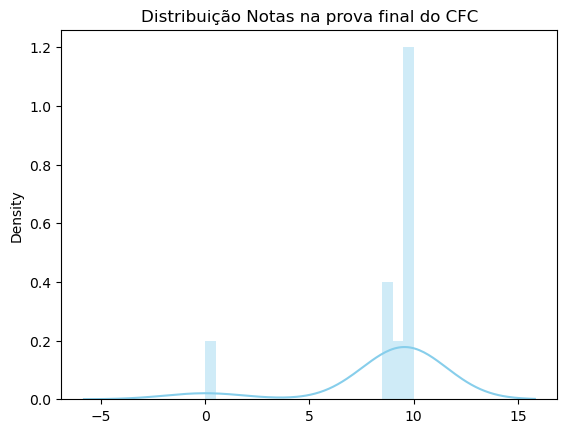

In [40]:
notas_finais_cfc = [0,8.7,8.7,9.0,9.5,10,10,10,10,10]
sns.distplot(notas_finais_cfc, color = 'skyblue', 
             label = 'nota_final_CFC', bins = 20).set_title('Distribuição Notas na prova final do CFC')

In [41]:
np.mean([0,8.7,8.7,9.0,9.5,10,10,10,10,10])

8.59

In [42]:
np.median([0,8.7,8.7,9.0,9.5,10,10,10,10,10])

9.75

In [43]:
df2 = pd.read_csv('carteira_medicina_familia_sintetica.csv',encoding='ISO-8859-1',delimiter=';',low_memory = False)
df2.head()

,id_patient,age_years,sex,number_of_children,flag_married,bmi_kg_m2,height_cm,weight_kg,hdl_mg_dl,ldl_mg_dl,...,index_systolic_blood_pressure,index_diastolic_blood_pressure,index_blood_pressure,sum_index_disease,avg_index_disease,target_index_disease,clients,unidade,mfc,new_score
0,1,23.600347,1,0,0,23.765629,151.049106,54.223261,67.119601,94.935636,...,1,2,3,18,1.636364,0,client04,un06,mfc21,0.000006
1,2,28.180492,1,0,0,22.891895,161.449691,59.670019,69.234692,95.230407,...,1,2,3,18,1.636364,0,client04,un12,mfc39,0.000006
2,3,24.916474,1,0,0,25.687941,156.140406,62.626754,60.938429,99.944524,...,1,2,3,20,1.818182,0,client04,un09,mfc27,0.037970
3,4,28.489040,1,0,0,22.802512,163.527442,60.976709,62.430110,94.763726,...,1,2,3,19,1.727273,0,client05,un15,mfc51,0.000040
4,5,23.580738,1,0,0,23.347263,162.206615,61.428950,64.926035,85.078514,...,1,1,1,16,1.454545,0,client06,un02,mfc59,0.000009


C:\Users\Osvaldo\anaconda3\envs\Oz\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribuição de Altura na Carteira de Medicina Familiar')

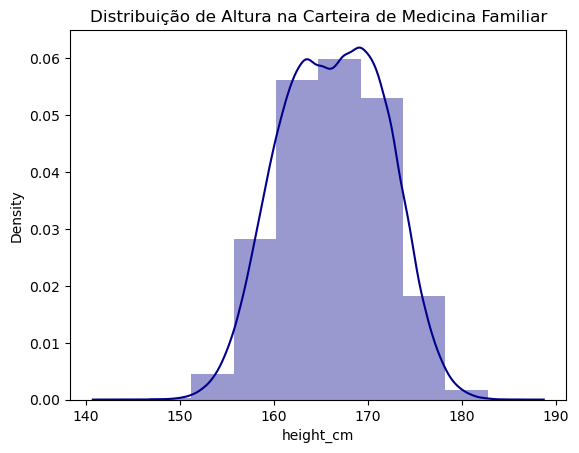

In [44]:
sns.distplot(df2['height_cm'] , color = 'darkblue', 
             label = 'var_continua_1', 
             bins=10, hist=True).set_title('Distribuição de Altura na Carteira de Medicina Familiar')

## Variância

A variância, comumente designada pela letra grega sigma ao quadrado $\sigma^2$ ou pela letra $S$ ou simplesmente $\text{ var}(x)$ sendo x uma variável aleatória, é uma medida de dispersão estatística, ou seja avalia como os dados em uma dada amostra populacional está espalhada. A fórmula matemática para o cálculo da variância é dada pela equação a seguir

\begin{equation}
\sigma^2 = \frac{1}{n-1}\sum_{i = 1}^{}(x_i − \bar{x})^2,
\end{equation}

sendo $\bar{x} = \frac{1}{n}\sum_i x_i$ a média da amostra.

### Exemplo 1

In [45]:
x = [8, 1.8, 4.5, 4.5, 25]

x_media = np.mean(x)
print('Media: ', x_media)

Media:  8.76


In [46]:
x_soma = (8 - x_media)**2 + (1.8 - x_media)**2 + (4.5 - x_media)**2 + (4.5 - x_media)**2 + (25 - x_media)**2
print('Somatoria: ', x_soma)

Somatoria:  349.052


In [47]:
# Modo incorreto:
print((8 - x_media) + (1.8 - x_media) + (4.5 - x_media) + (4.5 - x_media) + (25 - x_media))
# 

0.0


In [48]:
1 / (5 - 1)

0.25

In [49]:
# Variância: 
0.25 * 349.052

87.263

In [50]:
x = [8, 1.8, 4.5, 4.5, 25]

media_x = np.mean(x)

print('Media', media_x)

# Parte inicial da equação da variância
val_1 = 1/(5-1)

# Parte final da equação da variância
val_2 = (8- media_x)**2 + (1.8 - media_x)**2 + (4.5 - media_x)**2 + (4.5 - media_x)**2 + (25 - media_x)**2

# Modo errado, sem elevar ao quadrado
#val_2 = (8- media_x) + (1.8 - media_x) + (4.5 - media_x) + (4.5 - media_x) + (25 - media_x)
          

# Variância
val_1 * val_2

Media 8.76


87.263

In [51]:
x = [8, 1.8, 4.5, 4.5, 25]

n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
print(var_)

87.263


In [52]:
# import statistics
statistics.variance(x)

87.263

In [53]:
# Método do Raphael
def variancia(i):
    media = np.mean(i)
    soma = 0
    for x in i:
        soma += (x - media)**2
    return soma / (len(i)-1)


variancia(i = [8, 1.8, 4.5, 4.5, 25])

87.263

### Exemplo 2

Calculando a variância da altura da amostra Distribuição de Altura na Carteira de Medicina Familiar

In [54]:
df2['height_cm'].var()

30.332794173289418

In [55]:
df2['height_cm'][:20]

0     151.049106
1     161.449691
2     156.140406
3     163.527442
4     162.206615
5     158.539932
6     159.664250
7     161.319338
8     157.023768
9     162.745233
10    161.192918
11    164.688890
12    160.282837
13    160.427520
14    156.625667
15    159.050400
16    163.166785
17    164.668160
18    155.142977
19    160.278368
Name: height_cm, dtype: float64

In [56]:
df2['height_cm'].mean()

166.30274172077557

In [57]:
# Limite Inferior
166 - 5.5

160.5

In [58]:
# Limite Superior
166 + 5.5

171.5

In [59]:
[160.5, 171.5]

df2['height_cm'][:10]

0    151.049106
1    161.449691
2    156.140406
3    163.527442
4    162.206615
5    158.539932
6    159.664250
7    161.319338
8    157.023768
9    162.745233
Name: height_cm, dtype: float64

In [60]:
df2['height_cm'][150:160]

150    161.141250
151    164.232163
152    157.269379
153    163.098530
154    158.618594
155    168.260732
156    163.602296
157    160.027963
158    161.151716
159    167.764784
Name: height_cm, dtype: float64

## Desvio Padrão

O desvio padrão da amostra está relacionado diretamente a variância. Ele é calculado pela raiz quadrada da variância. É uma medida muito mais útil que a variância por está na mesma unidade que os dados, facilitando sua interpretação.

\begin{equation}
\sigma = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2}.
\end{equation}

### Exemplo 1

In [61]:
np.sqrt(30.33)

5.5072679252057455

In [62]:
x = [8, 1.8, 4.5, 4.5, 25]

n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)

sd = var_ ** 0.5

# ou

sd = np.sqrt(var_)

print(sd)

9.341466694261667


In [63]:
statistics.variance(x) ** .5

9.341466694261667

In [64]:
statistics.stdev(x)

9.341466694261667

### Exemplo 2

Calculando a variância da altura da amostra Distribuição de Altura na Carteira de Medicina Familiar

In [65]:
df2['height_cm'].std()

5.507521599893133

In [66]:
df2['height_cm'].mean()

166.30274172077557

In [67]:
# Limite Inferior
166-5.5

160.5

In [68]:
# Limite Superior
166+5.5

171.5

In [69]:
from numpy import random as rdn

x = rdn.normal(loc = 166, scale = 5.5,size=30)

print(x)

[162.4060513  158.73501633 168.86746896 158.51816354 172.72758507
 164.2395995  163.49595872 168.48234992 154.37164832 162.94722407
 163.63695249 168.03701482 156.42106721 168.78513947 171.76218314
 162.73375625 160.71864659 164.89057732 155.84178857 165.66754389
 158.02373972 173.41197856 164.23184169 166.07115183 164.51321916
 171.35733647 165.65218542 169.43590529 164.73431455 160.44545084]


In [70]:
# População Brasileira
altura_media = 173.1/100
desvio_padrao = 7.3/100

x = rdn.normal(loc=altura_media, scale=desvio_padrao, size=1000)
x[:20]

array([1.65129437, 1.79796114, 1.75449008, 1.74829413, 1.71492339,
       1.75971467, 1.61343579, 1.65767519, 1.7420548 , 1.73130166,
       1.73426702, 1.72260515, 1.66658282, 1.77632599, 1.74657629,
       1.66143855, 1.8497266 , 1.61192871, 1.81721619, 1.7263124 ])

C:\Users\Osvaldo\anaconda3\envs\Oz\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

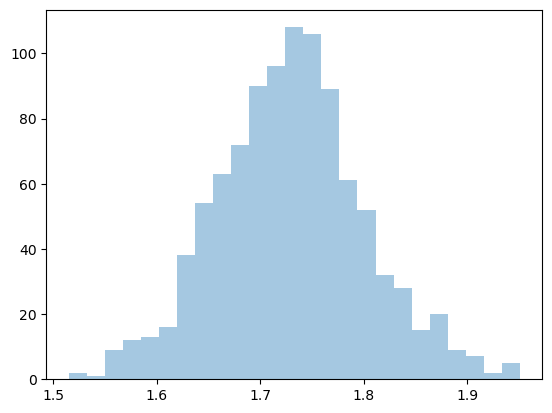

In [71]:
sns.distplot(x, hist=True, kde=False)

<AxesSubplot:ylabel='Density'>

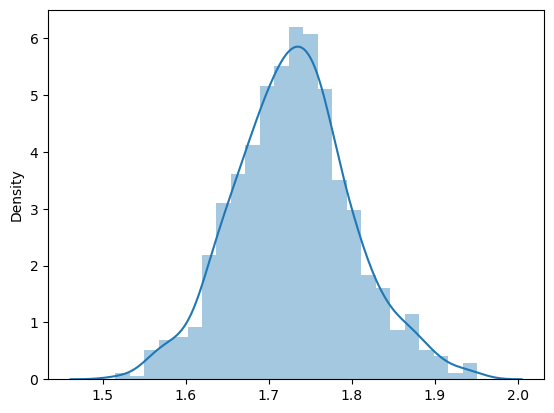

In [72]:
sns.distplot(x, hist=True, kde=True)

In [73]:
# População Brasileira
altura_media = 1.73
desvio_padrao = 0.07

# Amostra do Curso
amostra_curso = [1.78, 1.88, 1.65, 1.70, 1.62, 1.55, 1.77, 1.82, 1.75, 1.75, 1.53, 1.58, 1.85, 1.75, 1.62, 1.76, 1.82, 1.68,
1.78, 1.68, 1.60, 1.81, 1.60, 1.85, 1.83, 1.66, 1.64, 1.83, 1.57, 1.67, 1.75, 1.65, 1.79, 1.67, 1.75]

altura_media_curso = np.mean(amostra_curso)
print('Altura Media Curso:', altura_media_curso)

desv_pad_curso = round(np.std(amostra_curso),2)
print('Desv Pad Curso:', desv_pad_curso)

Altura Media Curso: 1.714
Desv Pad Curso: 0.09


C:\Users\Osvaldo\anaconda3\envs\Oz\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


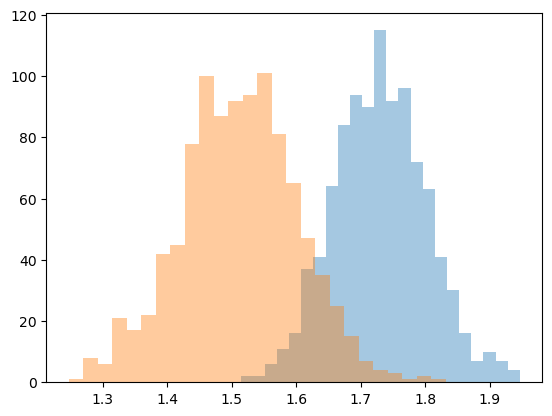

In [74]:
x = rdn.normal(loc=altura_media, scale=desvio_padrao, size=1000)
x2 = rdn.normal(loc=1.51, scale=0.09, size=1000)

sns.distplot(x, hist=True, kde=False)
sns.distplot(x2, hist=True, kde=False);

C:\Users\Osvaldo\anaconda3\envs\Oz\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Osvaldo\anaconda3\envs\Oz\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


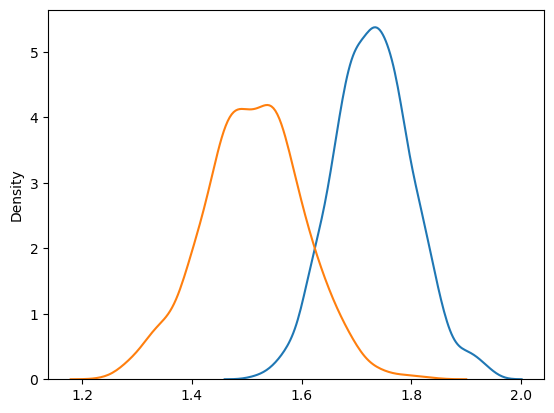

In [75]:
sns.distplot(x, hist=False, kde=True)
sns.distplot(x2, hist=False, kde=True);

## Propriedades da Distribuição Normal

In [76]:
altura_media_curso = np.mean(amostra_curso)
print('Altura Media Curso:', altura_media_curso)

desv_pad_curso = round(np.std(amostra_curso),2)
print('Desv Pad Curso:', desv_pad_curso)

Altura Media Curso: 1.714
Desv Pad Curso: 0.09


In [77]:
# Limite inferior (2 sd)
1.714 - 2 * 0.09

1.534

In [78]:
# Limite Superior (2 sd)
1.714 + 2 * 0.09

1.894

In [79]:
#Mais detalhes: https://www.statisticshowto.com/probability-and-statistics/normal-distributions/
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.statisticshowto.com/wp-content/uploads/2013/02/standard-normal-distribution.jpg")


* 68% dos estãos estão a 1 desvio padrão da média
* 95% dos dados estão a 2 desvios padrão da média
* 99.7% dos dados estão a 3 desvios padrão da média


C:\Users\Osvaldo\anaconda3\envs\Oz\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Osvaldo\anaconda3\envs\Oz\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


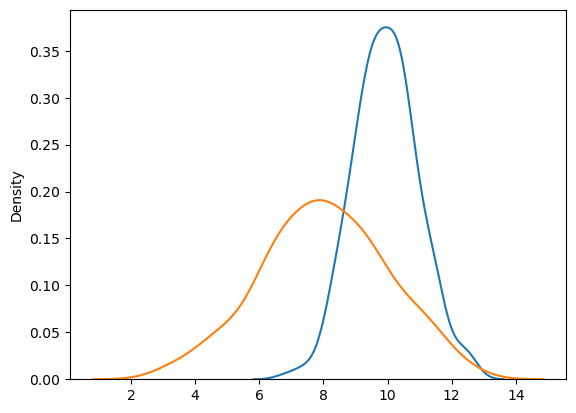

In [80]:
# Simulando distribuições com pequenas amostras
x1 = rdn.normal(loc=10, scale=1, size=300)
x2 = rdn.normal(loc=8, scale=2, size=300)

sns.distplot(x1, hist=False, kde=True)
sns.distplot(x2, hist=False, kde=True);

* Média, Moda e Mediana são iguais
* A curva é simétrica no centro
* A área total da curva é 1.

Mas ... no mundo digital, cada vez mais vemos distribuições que não "respeitam a normalidade". Uma delas é Distribuição de Cauda Longa que agora com ferramentas de machine learning podem ser exploradas. Para mais detalhes, veja: https://pt.wikipedia.org/wiki/Cauda_longa